<a href="https://colab.research.google.com/github/abduladebogun/Vehicle-Sales-and-Pricing/blob/main/vehicle_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vehicle Dataset: End-to-End Data Analysis Pipeline
This project aims to conduct an end-to-end data preprocessing, followed by exploratory data analysis (EDA) using a vehicle dataset. The goals of the project include:
- Cleaning the data
- Exploring patterns
- Visualizing relationships
- Preparing the data for modeling

## Step 1: Import Required Libraries
It is customary to have all import statements for libraries used in the project in the topmost code cell.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Step 2: Load the Dataset

Next step involves using the previously imported pandas library to load the dataset(s) into the project, and converted into a usable format; a dataframe.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# the variable name df is just common practice, you can use something different

df = pd.read_csv("/content/drive/MyDrive/PluralCode/Data Science With Python/PluralCode Data Science_Batch D/Car.csv")

# see if the data import code above works
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


## Step 3: Understand the Dataset
Initial observation of the data to understand it.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [ ]:
# look into the actual data
df.head() # and/or df.tail()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


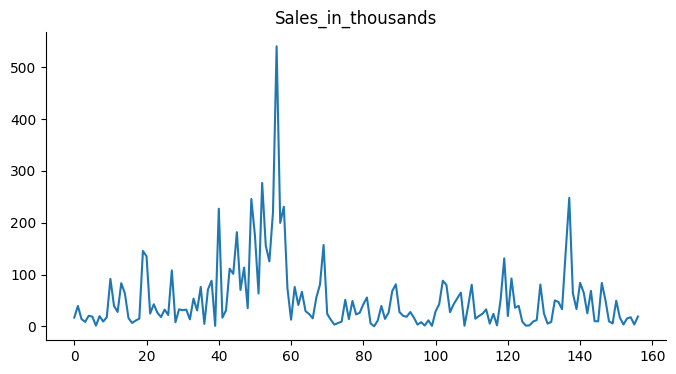

In [ ]:
# @title Sales_in_thousands

from matplotlib import pyplot as plt
df['Sales_in_thousands'].plot(kind='line', figsize=(8, 4), title='Sales_in_thousands')
plt.gca().spines[['top', 'right']].set_visible(False)

## Step 4: Handling Missing Values
Having observed the presence of missing data, next is to address it while ensuring minimal data loss.

In [ ]:
# Check for missing values
df.isnull().sum()

,0
Manufacturer,0
Model,0
Sales_in_thousands,0
__year_resale_value,36
Vehicle_type,0
Price_in_thousands,2
Engine_size,1
Horsepower,1
Wheelbase,1
Width,1


In [ ]:
# Instead of dropping columns with too many nulls..

# ..fill numeric columns with median
df.fillna(df.median(numeric_only=True), inplace=True)

# ..fill categorical columns with mode
df['Vehicle_type'].fillna(df['Vehicle_type'].mode()[0], inplace=True)

# chck again
df.isnull().sum()

,0
Manufacturer,0
Model,0
Sales_in_thousands,0
__year_resale_value,0
Vehicle_type,0
Price_in_thousands,0
Engine_size,0
Horsepower,0
Wheelbase,0
Width,0


## 🛠 Step 5: Fix Data Types and Clean Columns

In [ ]:
# Convert 'Latest_Launch' to datetime
df['Latest_Launch'] = pd.to_datetime(df['Latest_Launch'], errors='coerce')

# Rename strange columns
df.rename(columns={'__year_resale_value': 'Year_Resale_Value'}, inplace=True)

# Confirm types
df.dtypes

,0
Manufacturer,object
Model,object
Sales_in_thousands,float64
Year_Resale_Value,float64
Vehicle_type,object
Price_in_thousands,float64
Engine_size,float64
Horsepower,float64
Wheelbase,float64
Width,float64


In [ ]:
# print column and correpsonding data type

for col, dtype in df.dtypes.items():
    print(f"{col}: {dtype}")

Manufacturer: object
Model: object
Sales_in_thousands: float64
Year_Resale_Value: float64
Vehicle_type: object
Price_in_thousands: float64
Engine_size: float64
Horsepower: float64
Wheelbase: float64
Width: float64
Length: float64
Curb_weight: float64
Fuel_capacity: float64
Fuel_efficiency: float64
Latest_Launch: datetime64[ns]
Power_perf_factor: float64


## 📊 Step 6: Univariate Analysis

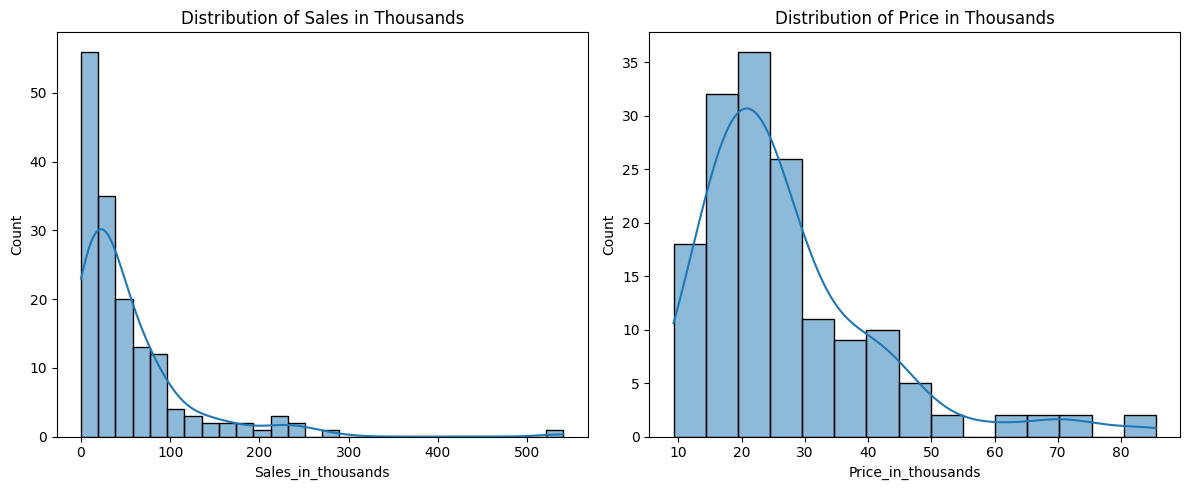

In [ ]:
# prompt: histogram for just two numerical variables

# Histograms for just two numerical variables
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Sales_in_thousands'], kde=True)
plt.title('Distribution of Sales in Thousands')

plt.subplot(1, 2, 2)
sns.histplot(df['Price_in_thousands'], kde=True)
plt.title('Distribution of Price in Thousands')

plt.tight_layout()
plt.show()

## 🔁 Step 7: Bivariate Analysis
This involves analysing two variables at a time to uncover relationships or show differences.

**Example Question**: Is there a relationship between a vehicle's horsepower and the price?

In [ ]:
# Automatically divide Horsepower into 5 equal-width bins
df['HP_Group'] = pd.cut(df['Horsepower'], bins=5)

# Calculate mean price for each horsepower group
mean_prices = df.groupby('HP_Group')['Price_in_thousands'].mean().round(2)

# Display result
print(mean_prices)

HP_Group
(54.605, 134.0]    14.31
(134.0, 213.0]     23.87
(213.0, 292.0]     38.10
(292.0, 371.0]     63.84
(371.0, 450.0]     69.72
Name: Price_in_thousands, dtype: float64


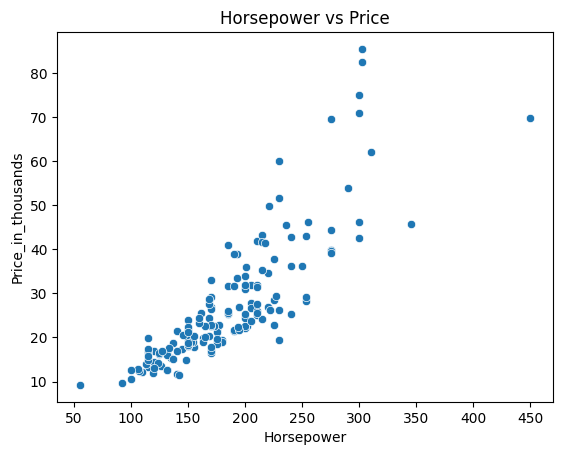

In [ ]:
# Scatter plot: Horsepower vs Price
sns.scatterplot(data=df, x='Horsepower', y='Price_in_thousands')
plt.title("Horsepower vs Price")
plt.show()

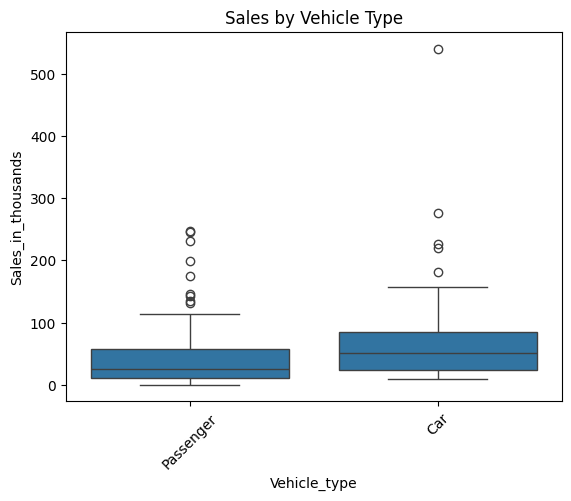

In [ ]:
# Boxplot: Vehicle Type vs Sales
sns.boxplot(data=df, x='Vehicle_type', y='Sales_in_thousands')
plt.title("Sales by Vehicle Type")
plt.xticks(rotation=45)
plt.show()

## 📈 Step 8: Correlation Analysis

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'Acura'

<Figure size 1200x800 with 0 Axes>

## 🚨 Step 9: Outlier Detection with Boxplots

In [ ]:
# Visualize outliers in key columns
cols = ['Sales_in_thousands', 'Price_in_thousands', 'Horsepower', 'Fuel_efficiency']
for col in cols:
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## 🧼 Step 10: Remove Outliers
We use the IQR method to minimize data loss while removing extreme values.

In [ ]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Apply outlier removal for selected columns
for col in cols:
    df = remove_outliers(df, col)

df.shape

## 💾 Final Step: Save Cleaned Data for Further Use

In [ ]:
df.to_csv("cleaned_vehicle_data.csv", index=False)
print("Cleaned dataset saved successfully!")